# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

C:\Users\surajshukla\AppData\Local\Temp\ipykernel_6224\3772209798.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Loading

In [2]:
data = pd.read_csv("data.csv")

# print(df.to_string()) # print entire dataframe
print(data) # print first 5 & last 5

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

# Data Features

In [3]:
features = data.columns

print(data.shape) # (569, 33)
# print(np.array(data))
for i, element in enumerate(features):
    print(f"{i} ---> {element}")


# total features = 33
# total examples = 569

(569, 32)
0 ---> id
1 ---> diagnosis
2 ---> radius_mean
3 ---> texture_mean
4 ---> perimeter_mean
5 ---> area_mean
6 ---> smoothness_mean
7 ---> compactness_mean
8 ---> concavity_mean
9 ---> concave points_mean
10 ---> symmetry_mean
11 ---> fractal_dimension_mean
12 ---> radius_se
13 ---> texture_se
14 ---> perimeter_se
15 ---> area_se
16 ---> smoothness_se
17 ---> compactness_se
18 ---> concavity_se
19 ---> concave points_se
20 ---> symmetry_se
21 ---> fractal_dimension_se
22 ---> radius_worst
23 ---> texture_worst
24 ---> perimeter_worst
25 ---> area_worst
26 ---> smoothness_worst
27 ---> compactness_worst
28 ---> concavity_worst
29 ---> concave points_worst
30 ---> symmetry_worst
31 ---> fractal_dimension_worst


# Data Visualization

In [4]:
data = data.drop('id', axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


conclusion: \n
    - radius mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst	are highly corelated
    - concavity_mean, concave points_mean, concave points_worst	are highly corelated
    - texture_mean, texture_worst are highly corelated

diagnosis
0    357
1    212
Name: count, dtype: int64


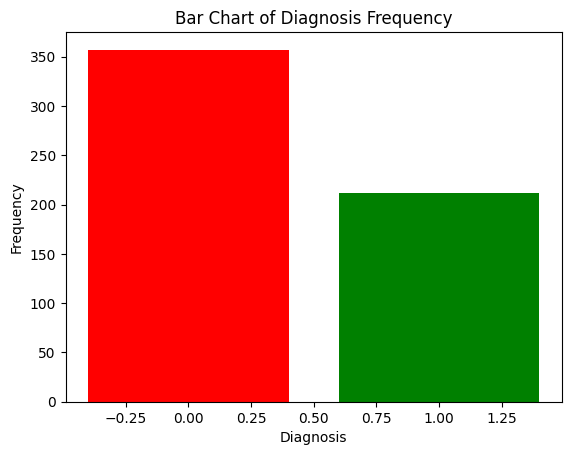

In [5]:
# Count the frequency of each diagnosis
diagnosis_counts = data['diagnosis'].value_counts()
print(diagnosis_counts)


# Plot bar chart for diagnosis frequency
plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['red', 'green'])
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Bar Chart of Diagnosis Frequency')
plt.show()


Conclusion: Unbalanced Dataset

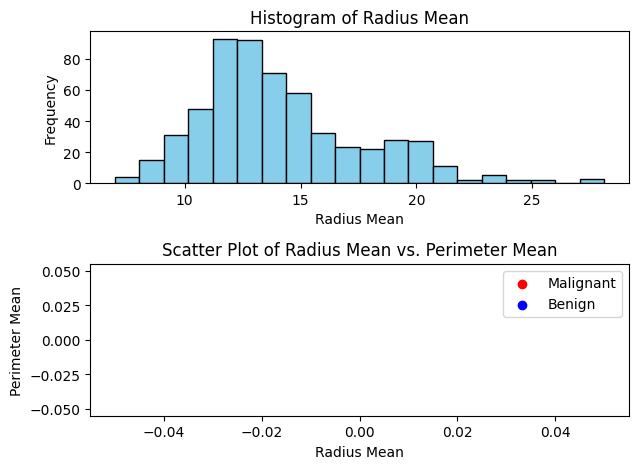

In [6]:
# Create a figure and set the size
# plt.figure(figsize=(10, 8))

# Plot histogram for radius_mean in the first subplot
plt.subplot(2, 1, 1)
plt.hist(data['radius_mean'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Mean')

# Plot scatter plot for radius_mean vs. perimeter_mean in the second subplot
plt.subplot(2, 1, 2)
plt.scatter(data[data['diagnosis'] == 'M']['radius_mean'], data[data['diagnosis'] == 'M']['perimeter_mean'], color='red', label='Malignant')
plt.scatter(data[data['diagnosis'] == 'B']['radius_mean'], data[data['diagnosis'] == 'B']['perimeter_mean'], color='blue', label='Benign')
plt.xlabel('Radius Mean')
plt.ylabel('Perimeter Mean')
plt.title('Scatter Plot of Radius Mean vs. Perimeter Mean')
plt.legend()

# Show the subplots
plt.tight_layout()
plt.show()

# Feature Selection

In [7]:
# preprocessed_data = np.delete(data, 0, axis=1)
preprocessed_data = np.array(data)

# Logistic Regression

In [8]:
X = np.array(data.drop(['diagnosis'], axis=1))
y = np.array(data['diagnosis'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the training set into training and cross-validation sets
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Cross-validation set shape:", X_cv.shape, y_cv.shape)

Training set shape: (341, 30) (341,)
Testing set shape: (114, 30) (114,)
Cross-validation set shape: (114, 30) (114,)


In [9]:
W = np.zeros(30)
b = 0

In [10]:
def compute_cost(X, y, W, b):
    m = X.shape[0]

    z = np.dot(W, X.T) + b
    f_wb = 1/(1 + np.exp(-1 * z))

    cost = (1/m)*np.sum((f_wb - y) ** 2)
    return cost

# print(compute_cost(X_train, y_train, W, b))


In [11]:
def compute_gradient(X, y, W, b):
    m = X.shape[0]
    
    z = np.dot(W, X.T) + b
    f_wb = 1/(1 + np.exp(-1 * z))

    dj_dw = (1/m)*np.sum((f_wb - y)*X.T)
    dj_db = (1/m)*np.sum(f_wb - y)
    
    return dj_dw, dj_db

# print(compute_gradient(X_train, y_train, W, b))

In [12]:
def gradient_descent(X, y, W_in, b_in, alpha, no_of_iterations): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    W = W_in  #avoid modifying global w within function
    b = b_in

    for i in range(no_of_iterations):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(X, y, W, b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        W = W - alpha * dj_dw  

        J_history.append(compute_cost(X, y, W, b))

    return W, b, J_history 



[0.0001288 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288
 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288
 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288
 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288 0.0001288
 0.0001288 0.0001288]
-1.6766698822065587e-06


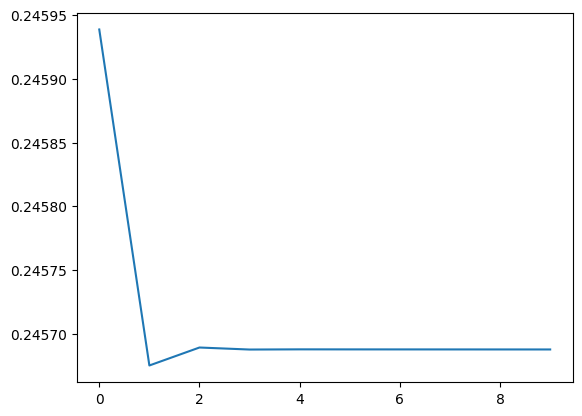

In [13]:
W_init = np.zeros(30)
b_init = 0
no_of_iterations = 10
alpha = 1e-6
W_final, b_final, J_hist = gradient_descent(X_train ,y_train, W_init, b_init, alpha, no_of_iterations)

print(W_final)
print(b_final)
# print(J_hist)

plt.plot(J_hist)
plt.show()

# cost_before = compute_cost(X_test, y_test, W_init, b_init)
# cost_after = compute_cost(X_test, y_test, w_final, b_final)

# print(cost_before, cost_after)

In [14]:
# cost_before = compute_cost(X_test, y_test, W_init, b_init)
# cost_after = compute_cost(X_test, y_test, W_final, b_final)
cost_cv = compute_cost(X_cv, y_cv, W_final, b_final)
cost_test = compute_cost(X_test, y_test, W_final, b_final)
cost_train = compute_cost(X_train, y_train, W_final, b_final)

print(cost_cv, cost_test, cost_train)

0.252255706057279 0.24514880882942947 0.24568778470314112


# Scikit-Learn Logistic Regression

In [15]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(np.array(X_train))

# print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
# print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

[18]


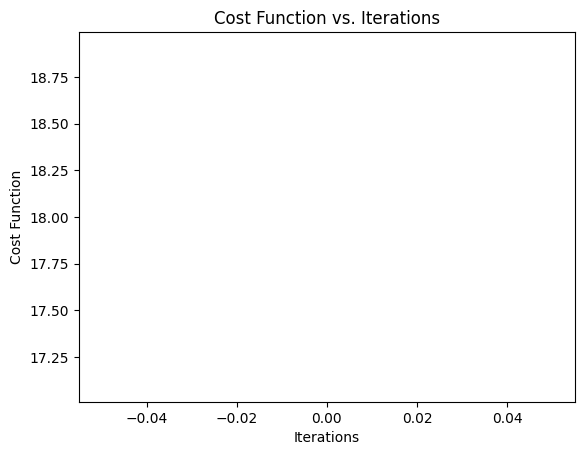

In [16]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

cost_values = lr_model.n_iter_
print(cost_values)

cost_values = lr_model.n_iter_

# Plot the cost function graph
plt.plot(cost_values)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iterations')
plt.show()

In [17]:
X_test_scaled = scaler_linear.fit_transform(np.array(X_test))
y_pred = lr_model.predict(X_test_scaled)

cost 
print("Prediction on training set:", y_pred)


NameError: name 'cost' is not defined